<a href="https://colab.research.google.com/github/paulnord/ExampleCode/blob/main/Realistic_LSTM_fitting_periodic_toy_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Toy LSTM Fitting.  


In [4]:
import numpy as np
import pandas as pd

# Parameters
num_samples = 10000  # Total number of samples
sequence_length = 256  # Length of each input sequence
frequency_range = (5, 75)  # Frequency range for sine wave
amplitude_range = (1.0, 10.0)  # Amplitude range for sine wave
phase_shift_range = (0, 2 * np.pi)  # Phase shift range for sine wave
noise_level = 3.0  # Standard deviation of added Gaussian noise

# Dataset split ratios
train_ratio = 0.7
validation_ratio = 0.2
test_ratio = 0.1

# Calculate dataset sizes
num_train = int(num_samples * train_ratio)
num_validation = int(num_samples * validation_ratio)
num_test = num_samples - num_train - num_validation

def generate_data(num_samples):
    inputs = []
    outputs = []

    for _ in range(num_samples):
        frequency = np.random.uniform(*frequency_range)
        amplitude = np.random.uniform(*amplitude_range)
        phase_shift = np.random.uniform(*phase_shift_range)

        # Generate sine wave
        x = np.linspace(0, 2 * np.pi, sequence_length)
        sine_wave = amplitude * np.sin(frequency * x / (2 * np.pi) + phase_shift)

        # Add noise
        sine_wave_noisy = sine_wave + np.random.normal(0, noise_level, size=sequence_length)

        # Append data
        inputs.append(sine_wave_noisy.tolist())  # Convert to list for proper CSV serialization
        outputs.append([frequency, amplitude, phase_shift])

    return inputs, np.array(outputs)

# Generate datasets
train_inputs, train_outputs = generate_data(num_train)
validation_inputs, validation_outputs = generate_data(num_validation)
test_inputs, test_outputs = generate_data(num_test)

# Save to CSV files
def save_to_csv(inputs, outputs, file_name):
    data = pd.DataFrame({
        'inputs': [','.join(map(str, input_row)) for input_row in inputs],  # Properly format inputs with commas
        'frequency': outputs[:, 0],
        'amplitude': outputs[:, 1],
        'phase_shift': outputs[:, 2],
    })
    data.to_csv(file_name, index=False)

save_to_csv(train_inputs, train_outputs, "train_data.csv")
save_to_csv(validation_inputs, validation_outputs, "validation_data.csv")
save_to_csv(test_inputs, test_outputs, "test_data.csv")

print("Data files created: train_data.csv, validation_data.csv, test_data.csv")


Data files created: train_data.csv, validation_data.csv, test_data.csv


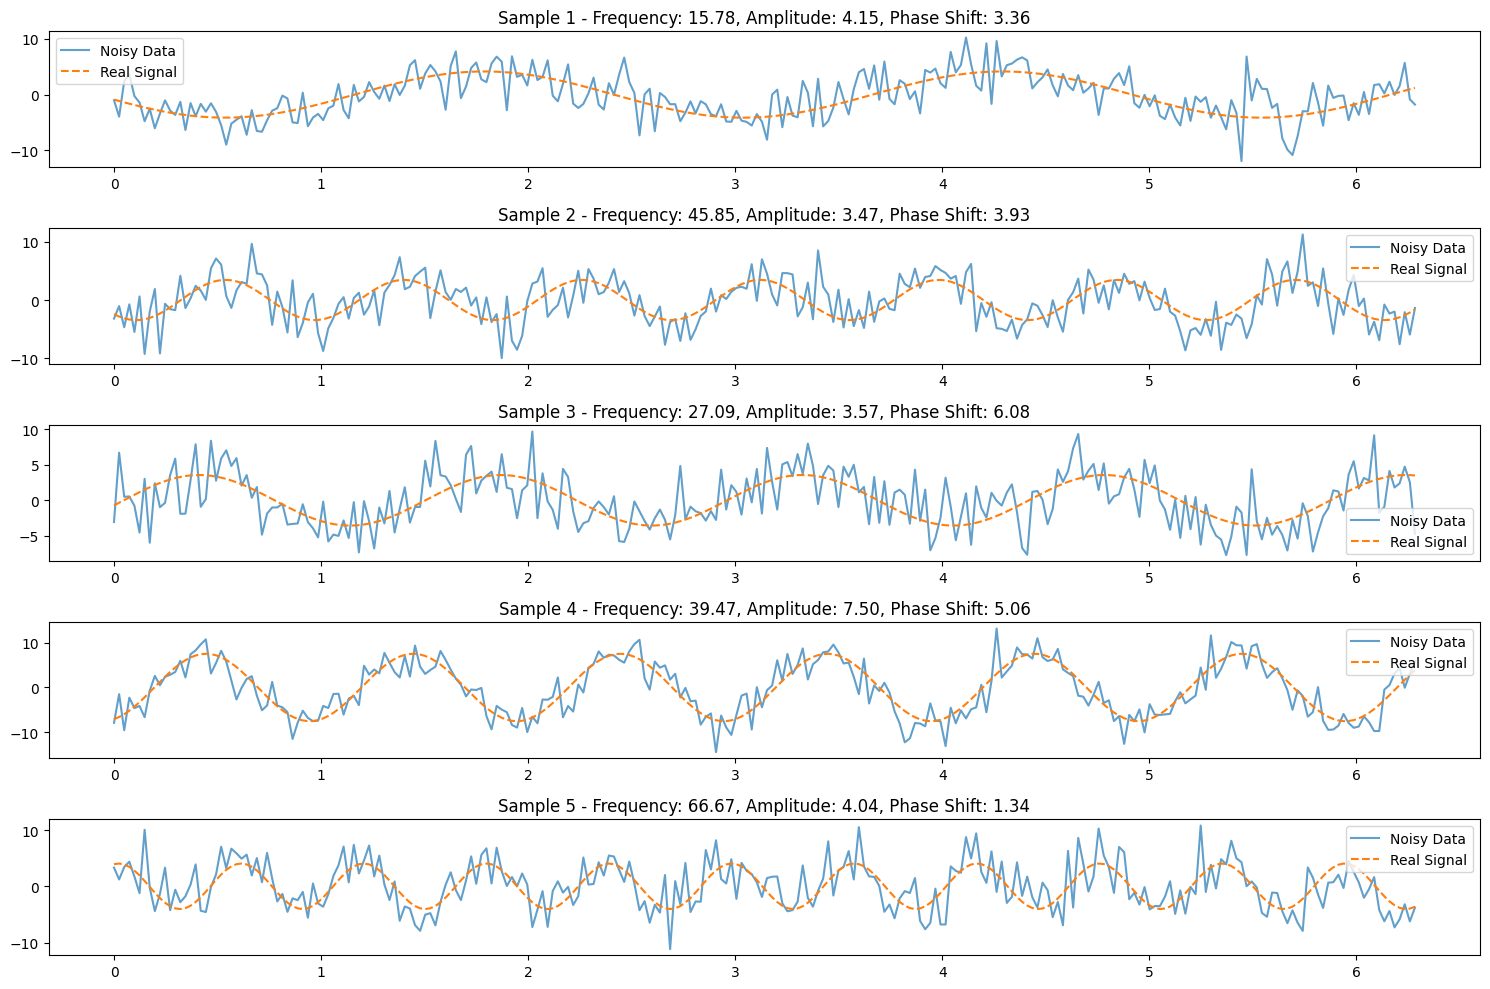

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reusing the load_data function
def load_data(file_name):
    data = pd.read_csv(file_name)

    # Parse inputs into a 2D NumPy array
    inputs = np.array(
        [np.array(eval(row)) if isinstance(row, str) else row for row in data["inputs"]]
    )

    # Extract outputs as a NumPy array
    outputs = data[["frequency", "amplitude", "phase_shift"]].values
    return inputs, outputs


# Load the training data
train_file = "train_data.csv"
inputs, outputs = load_data(train_file)
#print(inputs[3])

# Plot a few samples
num_samples_to_plot = 5
plt.figure(figsize=(15, 10))
x = np.linspace(0, 2 * np.pi, sequence_length)  # X-axis for the sine wave

for i in range(num_samples_to_plot):
    noisy_data = inputs[i]
    frequency, amplitude, phase_shift = outputs[i]
    real_signal = amplitude * np.sin(frequency * x / (2 * np.pi) + phase_shift)

    plt.subplot(num_samples_to_plot, 1, i + 1)
    plt.plot(x, noisy_data, label="Noisy Data", alpha=0.7)
    plt.plot(x, real_signal, label="Real Signal", linestyle="--")
    plt.title(f"Sample {i + 1} - Frequency: {frequency:.2f}, Amplitude: {amplitude:.2f}, Phase Shift: {phase_shift:.2f}")
    plt.legend()

plt.tight_layout()
plt.show()


Is GPU available?  []
New train inputs shape: (28000, 64, 1)
New train outputs shape: (28000, 3)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                       │ (None, 64, 32)              │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_25 (LSTM)                       │ (None, 64, 32)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_26 (LSTM)                       │ (None, 64, 32)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_27 (LSTM)                       │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,891 (116.76 KB)

 Trainable params: 29,891 (116.76 KB)

 Non-trainable params: 0 (0.00 B)

None


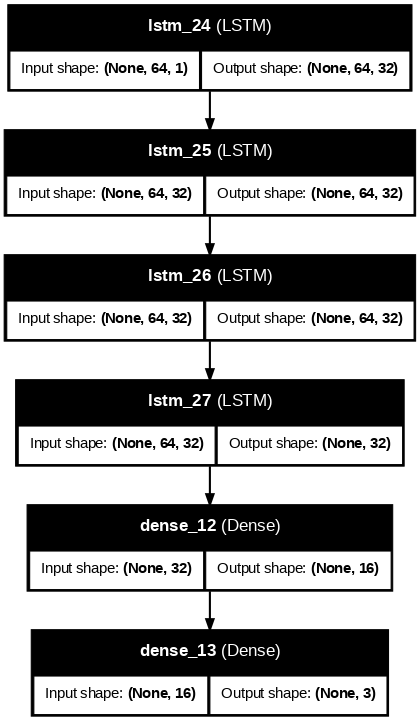

Epoch 1/200


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam, Adagrad
from tensorflow.config import list_physical_devices
from IPython.display import Image, display

# Check if GPU is available
gpu_available = list_physical_devices('GPU')
print("Is GPU available? ", gpu_available)

# Helper function to load data from CSV
def load_data(file_name):
    data = pd.read_csv(file_name)
    inputs = np.array([np.fromstring(row.strip("[]"), sep=",") for row in data["inputs"]])
    outputs = data[["frequency", "amplitude", "phase_shift"]].values
    return inputs, outputs

# Load datasets
train_inputs, train_outputs = load_data("train_data.csv")
validation_inputs, validation_outputs = load_data("validation_data.csv")
test_inputs, test_outputs = load_data("test_data.csv")

def reshape_to_chunks(data, chunk_size):
    num_chunks = data.shape[1] // chunk_size
    reshaped = data[:, :num_chunks * chunk_size].reshape(-1, chunk_size, 1)
    return reshaped

chunk_size = 64
train_inputs = reshape_to_chunks(train_inputs, chunk_size)
validation_inputs = reshape_to_chunks(validation_inputs, chunk_size)
test_inputs = reshape_to_chunks(test_inputs, chunk_size)

# Calculate the number of chunks per original sequence
num_chunks_per_sequence = train_inputs.shape[0] // train_outputs.shape[0]

# Repeat the outputs to align with the number of chunks
train_outputs = np.repeat(train_outputs, num_chunks_per_sequence, axis=0)
validation_outputs = np.repeat(validation_outputs, num_chunks_per_sequence, axis=0)
test_outputs = np.repeat(test_outputs, num_chunks_per_sequence, axis=0)

# Check alignment
print("New train inputs shape:", train_inputs.shape)
print("New train outputs shape:", train_outputs.shape)

## Reshape inputs for LSTM: (samples, time_steps, features)
#train_inputs = train_inputs.reshape(train_inputs.shape[0], train_inputs.shape[1], 1)
#validation_inputs = validation_inputs.reshape(validation_inputs.shape[0], validation_inputs.shape[1], 1)
#test_inputs = test_inputs.reshape(test_inputs.shape[0], test_inputs.shape[1], 1)

# Build the LSTM model
model = Sequential()

# Input layer (first LSTM layer)
model.add(LSTM(32, activation='tanh', input_shape=(chunk_size, 1), return_sequences=True))

# Additional stacked LSTM layers
model.add(LSTM(32, activation='tanh', return_sequences=True))
model.add(LSTM(32, activation='tanh', return_sequences=True))
model.add(LSTM(32, activation='tanh'))  # Final LSTM layer, no return_sequences

# Dense layer with 16 neurons
model.add(Dense(16, activation='relu'))

# Output layer with dimension 2
model.add(Dense(3)) # 3 outputs: frequency, amplitude, phase_shift

# Create a custom optimizer
#optimizer = Adam(learning_rate=0.0005)
optimizer = Adagrad(learning_rate=0.0004)

# Compile the model
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Print the model summary
print(model.summary())

# Generate a diagram of the model and display it inline
plot_file = "model_diagram.png"
plot_model(model, to_file=plot_file, show_shapes=True, show_layer_names=True, dpi=75)

# Display the diagram in Colab
display(Image(plot_file))

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model
history = model.fit(
    train_inputs, train_outputs,
    validation_data=(validation_inputs, validation_outputs),
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping]
)

# Evaluate on the test set
test_loss, test_mae = model.evaluate(test_inputs, test_outputs)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Make predictions on the test set
predictions = model.predict(test_inputs)

# Save predictions and test outputs for comparison
predictions_df = pd.DataFrame(predictions, columns=["predicted_frequency", "predicted_amplitude", "predicted_phase_shift"])
actuals_df = pd.DataFrame(test_outputs, columns=["actual_frequency", "actual_amplitude", "actual_phase_shift"])
comparison_df = pd.concat([predictions_df, actuals_df], axis=1)
comparison_df.to_csv("predictions_vs_actuals.csv", index=False)

print("Predictions vs Actuals saved to predictions_vs_actuals.csv")


   predicted_frequency  predicted_amplitude  predicted_phase_shift  \
0            22.903309             4.162871               2.297133   
1            44.774788             3.440747               2.363773   
2            44.482445             3.240613               2.317525   
3            65.641290             3.122728               1.873970   
4            18.997076             4.410160               2.442087   

   actual_frequency  actual_amplitude  actual_phase_shift  
0         20.144037          8.781285            5.926388  
1         48.700753          3.523521            2.401822  
2         43.941822          6.815216            3.932693  
3         65.646902          9.206302            4.446802  
4         18.196801          9.783166            1.176596  


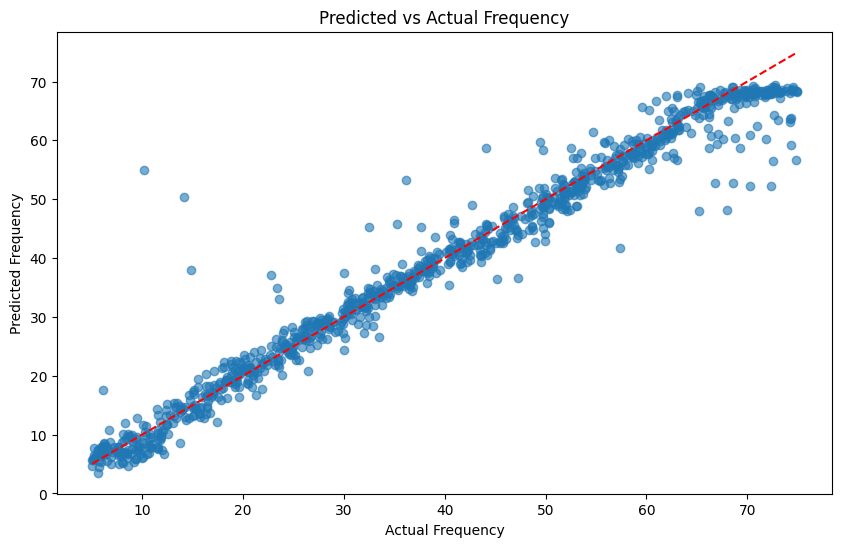

In [ ]:
import pandas as pd

# Load the predictions vs actuals file
file_name = "predictions_vs_actuals.csv"
comparison_df = pd.read_csv(file_name)

# Display the predictions vs actuals data
print(comparison_df.head())  # Show the first few rows of the dataset

# Optionally, visualize the data
import matplotlib.pyplot as plt

# Plot predicted vs actual frequencies
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df["actual_frequency"], comparison_df["predicted_frequency"], alpha=0.6)
plt.plot([comparison_df["actual_frequency"].min(), comparison_df["actual_frequency"].max()],
         [comparison_df["actual_frequency"].min(), comparison_df["actual_frequency"].max()],
         color='red', linestyle='--')
plt.title("Predicted vs Actual Frequency")
plt.xlabel("Actual Frequency")
plt.ylabel("Predicted Frequency")
plt.show()

# Similarly, you can create plots for amplitude and phase shift:
# Uncomment and repeat for amplitude and phase shift if desired
# Replace "frequency" with "amplitude" or "phase_shift" in column names


   predicted_frequency  predicted_amplitude  predicted_phase_shift  \
0            22.903309             4.162871               2.297133   
1            44.774788             3.440747               2.363773   
2            44.482445             3.240613               2.317525   
3            65.641290             3.122728               1.873970   
4            18.997076             4.410160               2.442087   

   actual_frequency  actual_amplitude  actual_phase_shift  
0         20.144037          8.781285            5.926388  
1         48.700753          3.523521            2.401822  
2         43.941822          6.815216            3.932693  
3         65.646902          9.206302            4.446802  
4         18.196801          9.783166            1.176596  


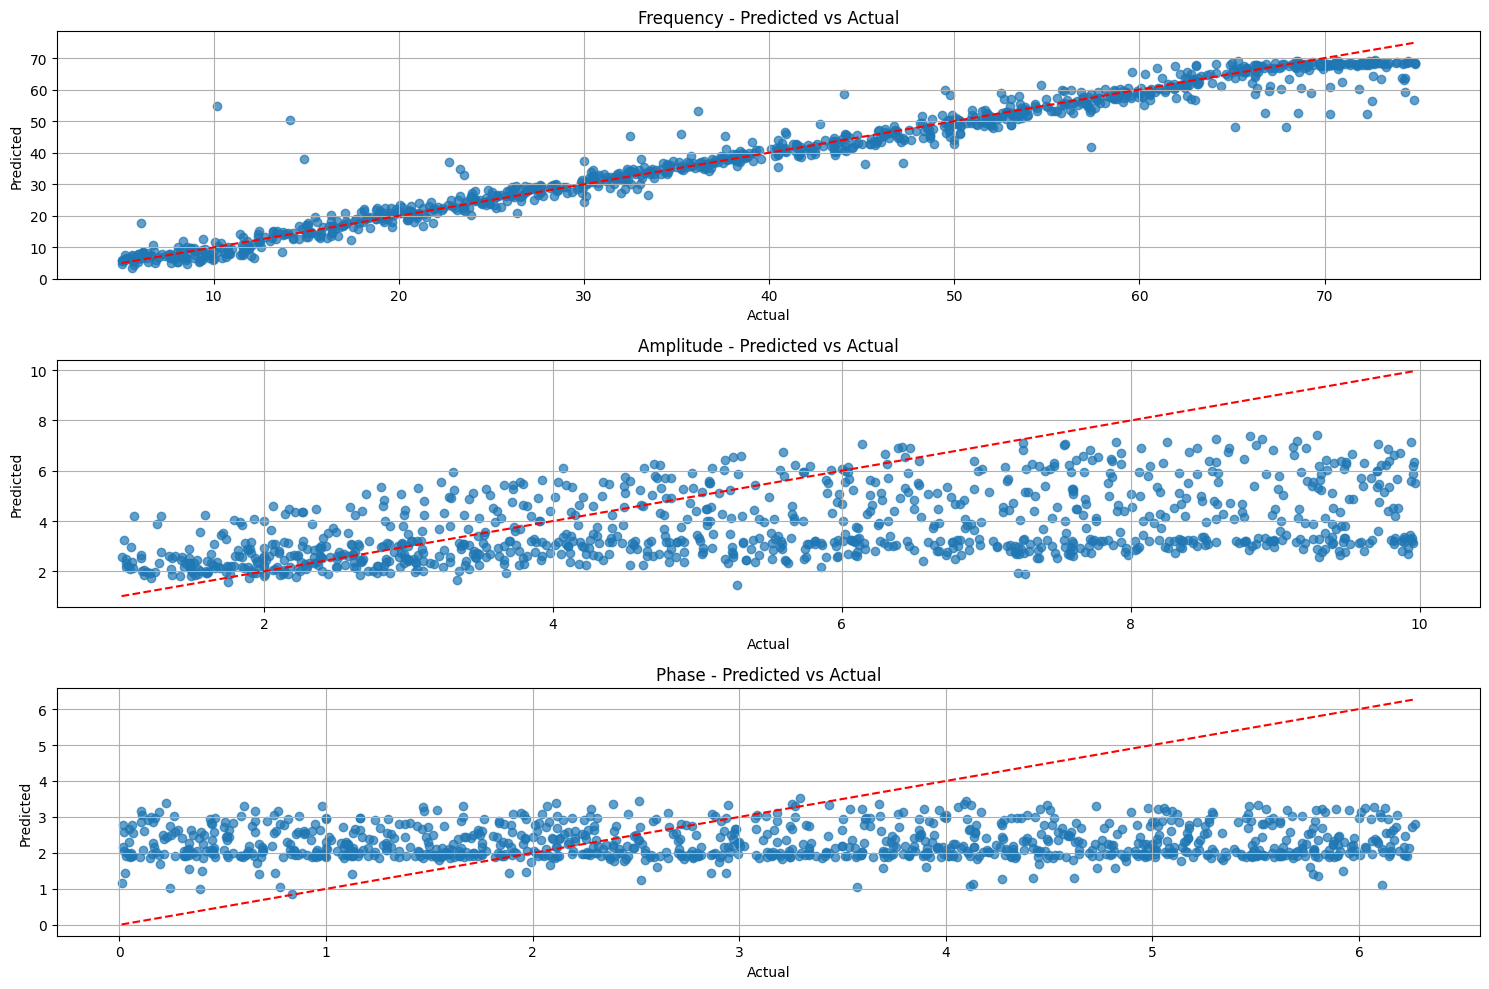

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the predictions vs actuals data
predictions_file = "predictions_vs_actuals.csv"
data = pd.read_csv(predictions_file)

# Display the predictions vs actuals data
print(data.head())  # Show the first few rows of the dataset

# Extract columns for plotting
predicted_columns = ["predicted_frequency", "predicted_amplitude", "predicted_phase_shift"]
actual_columns = ["actual_frequency", "actual_amplitude", "actual_phase_shift"]

# Plot each correlation
plt.figure(figsize=(15, 10))

for i, (predicted, actual) in enumerate(zip(predicted_columns, actual_columns)):
    plt.subplot(3, 1, i + 1)
    plt.scatter(data[actual], data[predicted], alpha=0.7)
    plt.plot(
        [data[actual].min(), data[actual].max()],
        [data[actual].min(), data[actual].max()],
        color='red', linestyle='--'
    )
    plt.title(f"{actual.split('_')[1].capitalize()} - Predicted vs Actual")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.grid(True)

plt.tight_layout()
plt.show()

